## Kepler's equation solver
Trevor Dorn-Wallenstein

Kolby Weisenburger

In [1]:
using PyPlot

/Users/kolbylyn/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# From time to M
M(t::Float64,t_p::Float64,P::Float64) = (2*pi/P)*(t-t_p)

M (generic function with 1 method)

In [3]:
# this should evaluate to zero when E is correct
g(E::Float64,e,m) = E - e*sin(E) - m

g (generic function with 1 method)

In [4]:
# g'(E)
g_prime(E::Float64,e) = 1.0 - e*cos(E) 

g_prime (generic function with 1 method)

In [5]:
# +1 for positive x, -1 for negative
sign(x::Float64) = x/abs(x)

sign (generic function with 1 method)

In [6]:
# best guess at initial E0
E0(m::Float64) = m + 0.85*sign(sin(m))

E0 (generic function with 1 method)

In [7]:
function newtons(f::Function,f_prime::Function,E_0::Float64,e::Float64,m::Float64,dE=1.;delta=1e-14)

    E_new = E_0
    
    while abs(dE)>delta
        E_old = E_new
        E_new = E_old - (f(E_old,e,m)/f_prime(E_old,e))
        dE = E_new-E_old
    end
    
    return E_new
    
end

newtons (generic function with 2 methods)

In [8]:
EtoF(E::Float64,e::Float64) = 2.*atan((((1.+e)/(1.-e))^(1./2.))*tan(E/2.))

EtoF (generic function with 1 method)

In [9]:
EtoR(E::Float64,e::Float64,a::Float64) = a*(1-e*cos(E))

EtoR (generic function with 1 method)

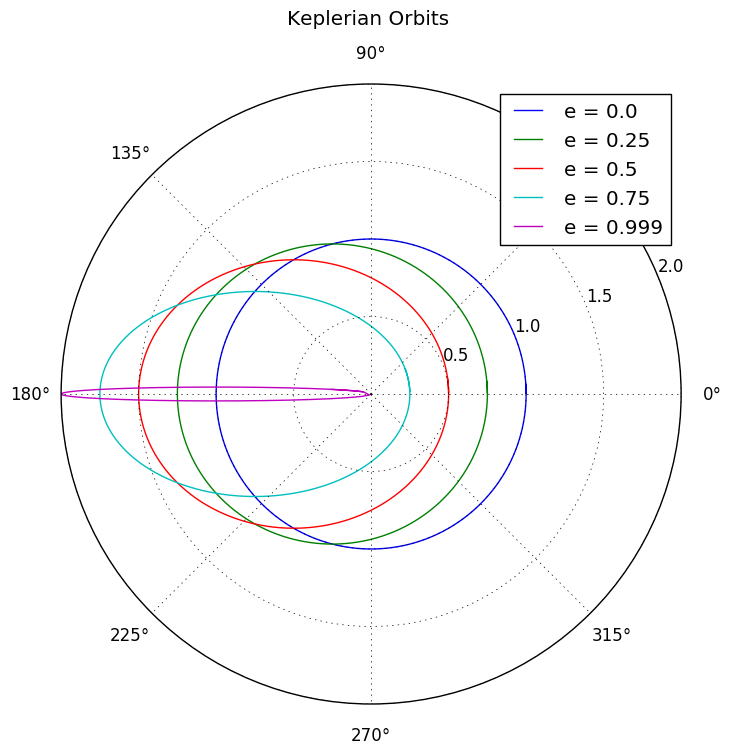

In [36]:
# figure to demonstrate that our solver generates the correct Keplerian orbits

fig = figure("orbits",figsize=(8,8))
ax = axes(polar="true")
title("Keplerian Orbits \n")
times = linspace(0,1.01,1000)
period = 1.0
sma = 1.0
t_0 = 0.
es = [0.,0.25,0.5,0.75,0.999]
for e in es
    rs = []
    fs = []
    for time in times
        em = M(time,t_0,period)
        E = newtons(g,g_prime,E0(em),e,em)
        append!(fs,[EtoF(E,e)])
        append!(rs,[EtoR(E,e,sma)])
    end
    plot(fs,rs,label="e = $e")
end
legend(loc=0)
show()

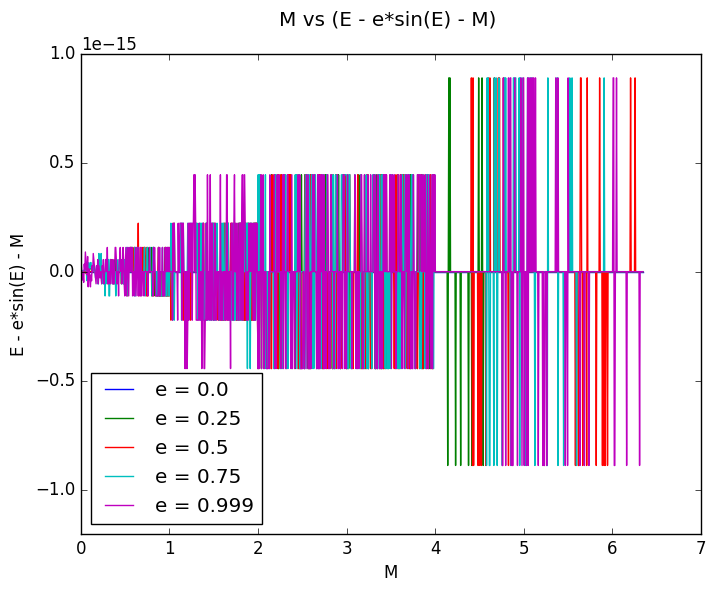

In [35]:
# figure to show the errors from our solver. errors are of order 10^-15 !

fig = figure("M vs M",figsize=(8,6))
title("M vs (E - e*sin(E) - M) \n")
times = linspace(0,1.01,1000)
period = 1.0
sma = 1.0
t_0 = 0.
es = [0.,0.25,0.5,0.75,0.999]
for e in es
    xs = []
    ys = []
    for time in times
        em = M(time,t_0,period)
        E = newtons(g,g_prime,E0(em),e,em)
        dif = g(E, e, em)
        append!(xs,[em])
        append!(ys,[dif])
    end
    plot(xs,ys,label="e = $e")
    ylabel("E - e*sin(E) - M")
    xlabel("M")
    ylim(-1.2e-15,1e-15)
end
legend(loc=0)
show()